## Titanic with seaborn visualization 
**the main goal of this notebook is learning Seabor library fundamentals for data visualization**


we will be working with a dataset of the passengers of the Titanic. Titanic shipwreck the most famous shipwreck in history when there were no life enough lfe boats for every passenger on board which means some passengers were prioritized over others to the lifeboats.
the dataset was compiled by <a href = "www.kagglw.com">Kaggle</a> for their introductory data science competition **Titanic Machine Learning from Disaster** you can download the data <a href = "">here</a> 
we will work with the training.csv file s we will make some visualizations only with seaborn to interpret the data so the label is not deleted in **train.csv** file.

each row in the data represents a passenger with some details we are going to choose the important features only to our goal and removing unnecessary data before visualizing, here is the describtion of each column in **Titanic dataset:

- `Passenger` :: Anumerical id assigned to each passenger

- `Survived` :: whether the passenger survived (1) or not (0)
- `Pclass` :: the class the passenger was in 
- `Name` :: the name of the passenger 
- `Sex` :: the gender of passenger male or female  
- `Age` :: the age of the passenger Fractional
- `SibSp` :: the number of siblings and supouses the passenger had on board
- 
- 
- 
- 


In [1]:
# import librries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

# ignore jupyter notebook warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the dataset 
titanic = pd.read_csv("Titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- keep the important columns only 

In [3]:
# important columns
columns = ['Pclass', 'Sex', 'Age', 'SibSp',
       'Parch',  'Fare',  'Embarked' , 'Survived']


titanic = titanic[columns].dropna()
titanic.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0


### start use seaborn 
- creating hitograms

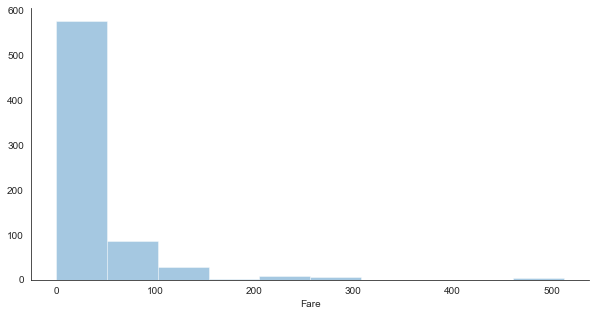

In [4]:
# creating histograms
plt.figure(figsize= (10,5)) # increase the figure size
sns.set_style("white")
sns.distplot(titanic["Fare"],bins = 10, kde = False )
# styling 
sns.despine()
plt.show()

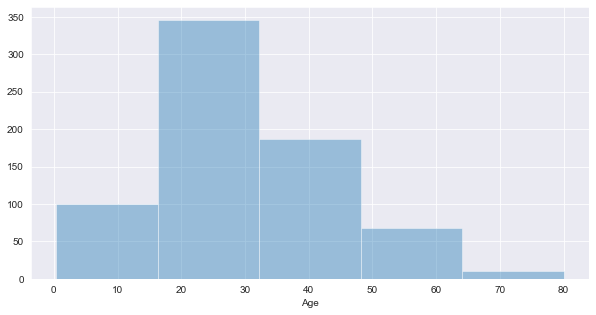

In [5]:
# Age histogram
sns.set_style("darkgrid")
plt.figure(figsize = (10,5))

sns.distplot(titanic["Age"], kde = False , bins = 5)
plt.show()

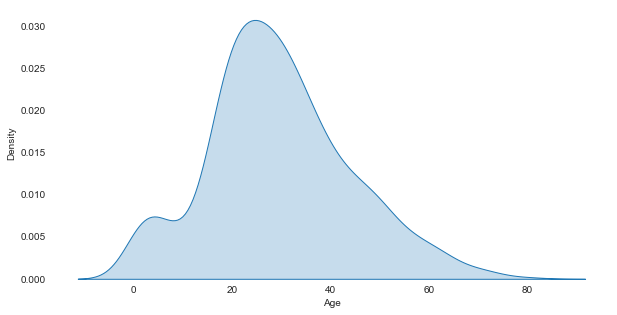

In [6]:
sns.set_style("white")
plt.figure(figsize = (10,5))

sns.kdeplot(titanic["Age"] , shade = True)
sns.despine(left = True, bottom = True)

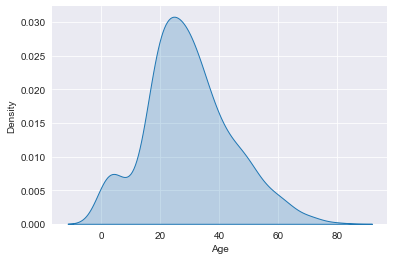

In [7]:
sns.set_style("darkgrid")
sns.kdeplot(titanic["Age"], shade = True)
sns.despine(left = True , bottom = True)

**Conditional distributions using a single plot**

<AxesSubplot:xlabel='Age', ylabel='Density'>

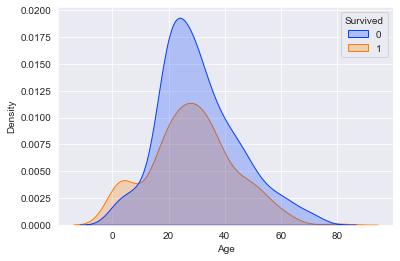

In [8]:
sns.kdeplot(titanic["Age"] , shade = True , hue = titanic["Survived"], palette="bright")

**but we need to make seperate plots in rows and columns like what we did in last mission what should we do ?**

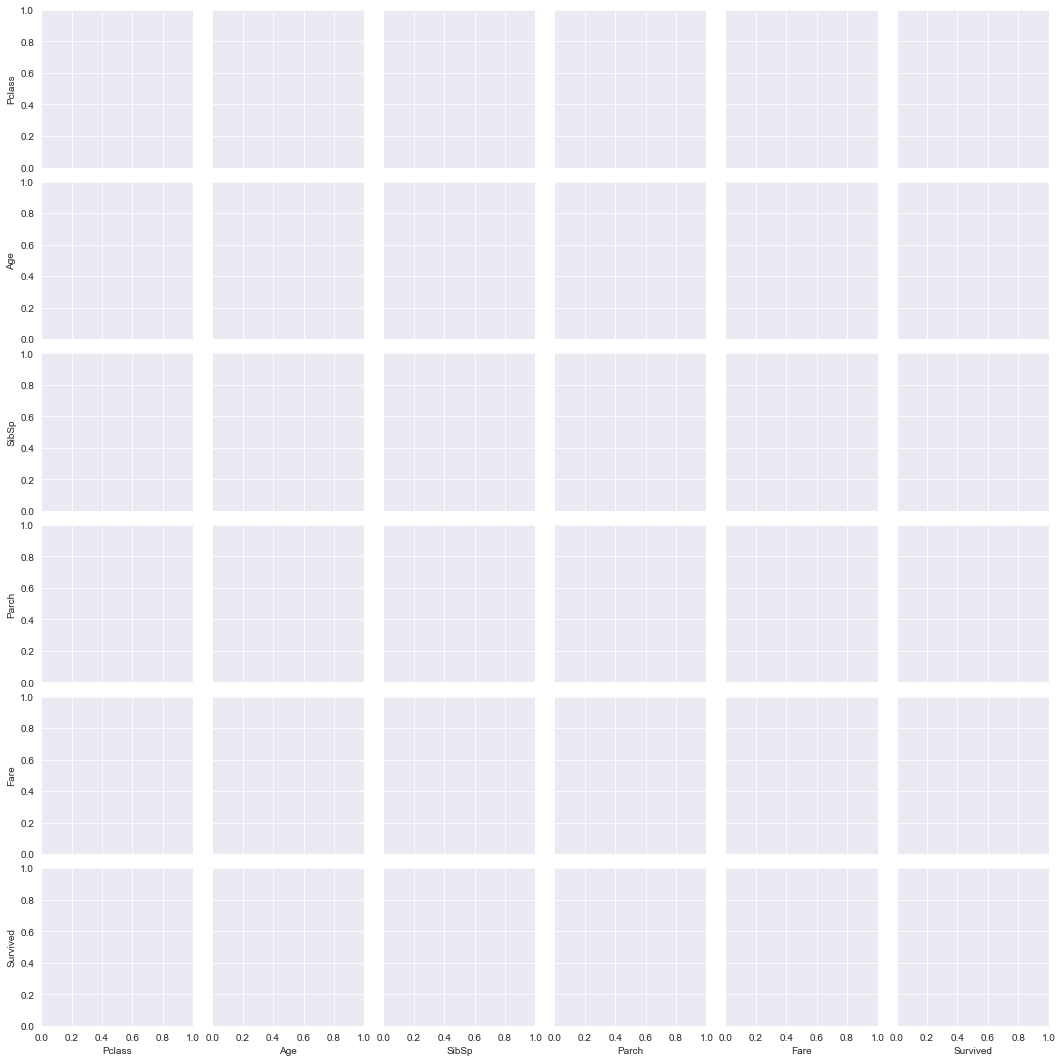

In [9]:
# here the PairGrid is creating a Agrid for each column and the relationship with other columns
sns.PairGrid(titanic)

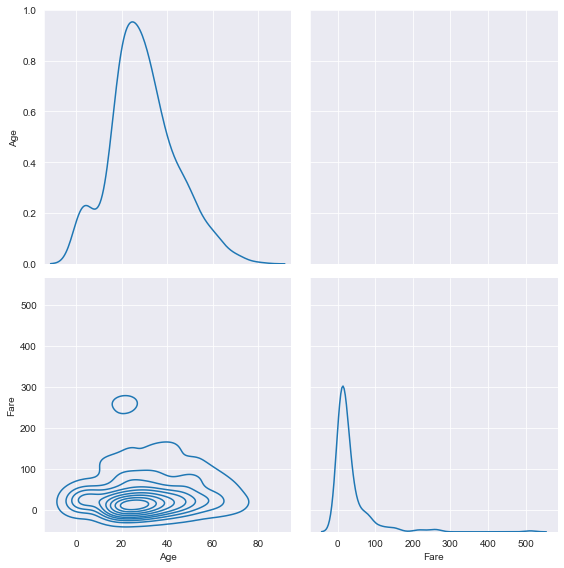

In [10]:
g = sns.PairGrid(titanic[["Age" , "Fare"]] , size = 4)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot)

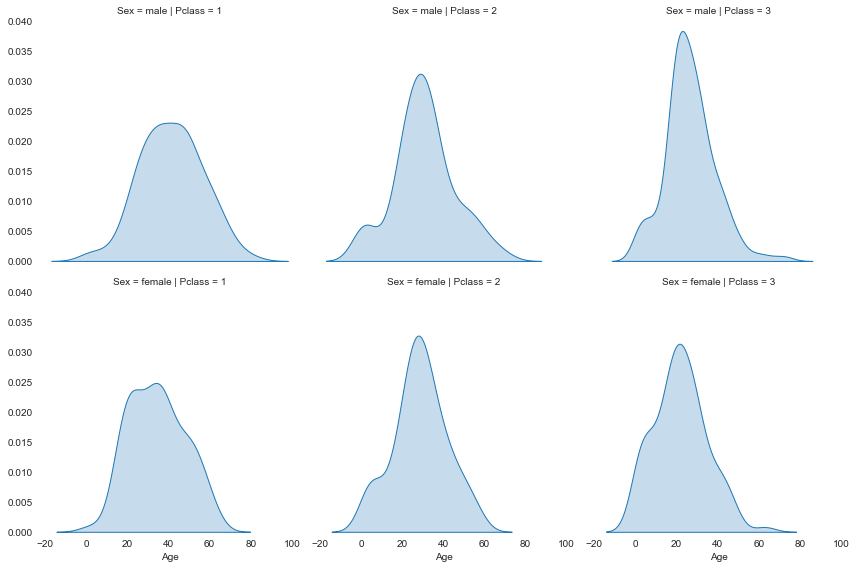

In [11]:
# we have another plot based on the grid called FacetGrid
sns.set_style("white")
g = sns.FacetGrid(titanic, col = "Pclass", size = 4 , row = "Sex")
g.map(sns.kdeplot , "Age" , shade = True)

sns.despine(left = True, bottom = True)

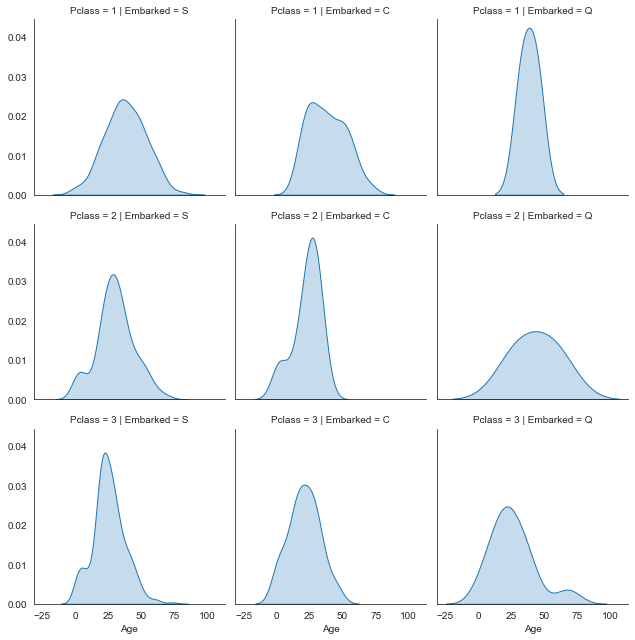

In [12]:
g = sns.FacetGrid(titanic , row= "Pclass" , col = "Embarked")
g.map_dataframe(sns.kdeplot , "Age" , shade = True)

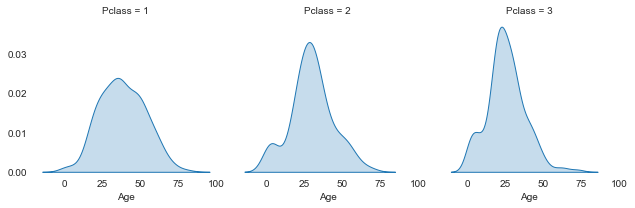

In [13]:
g = sns.FacetGrid(titanic, col = "Pclass" , size = 3)
g.map(sns.kdeplot, "Age" , shade = True)
sns.despine(left = True, bottom = True)
plt.show()

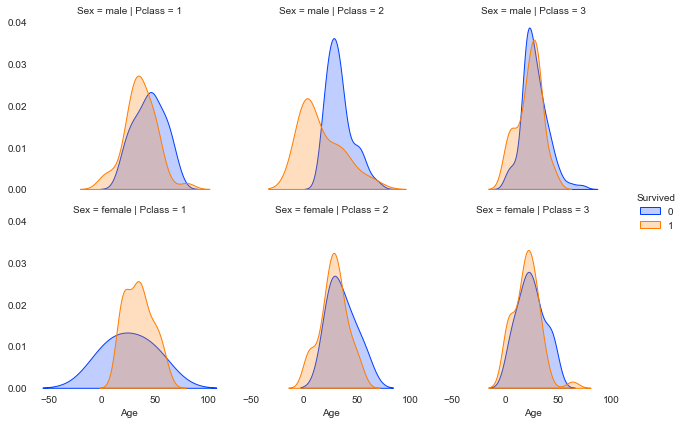

In [14]:
# using 2 conditions for plots with row, col variables 
g = sns.FacetGrid(titanic, col = "Pclass" , row = "Sex" , size = 3 , hue = "Survived" , 
                 palette= "bright")
g.map(sns.kdeplot, "Age" , shade = True)
g.add_legend()
sns.despine(left = True, bottom = True)
plt.show()

In [15]:
titanic.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0


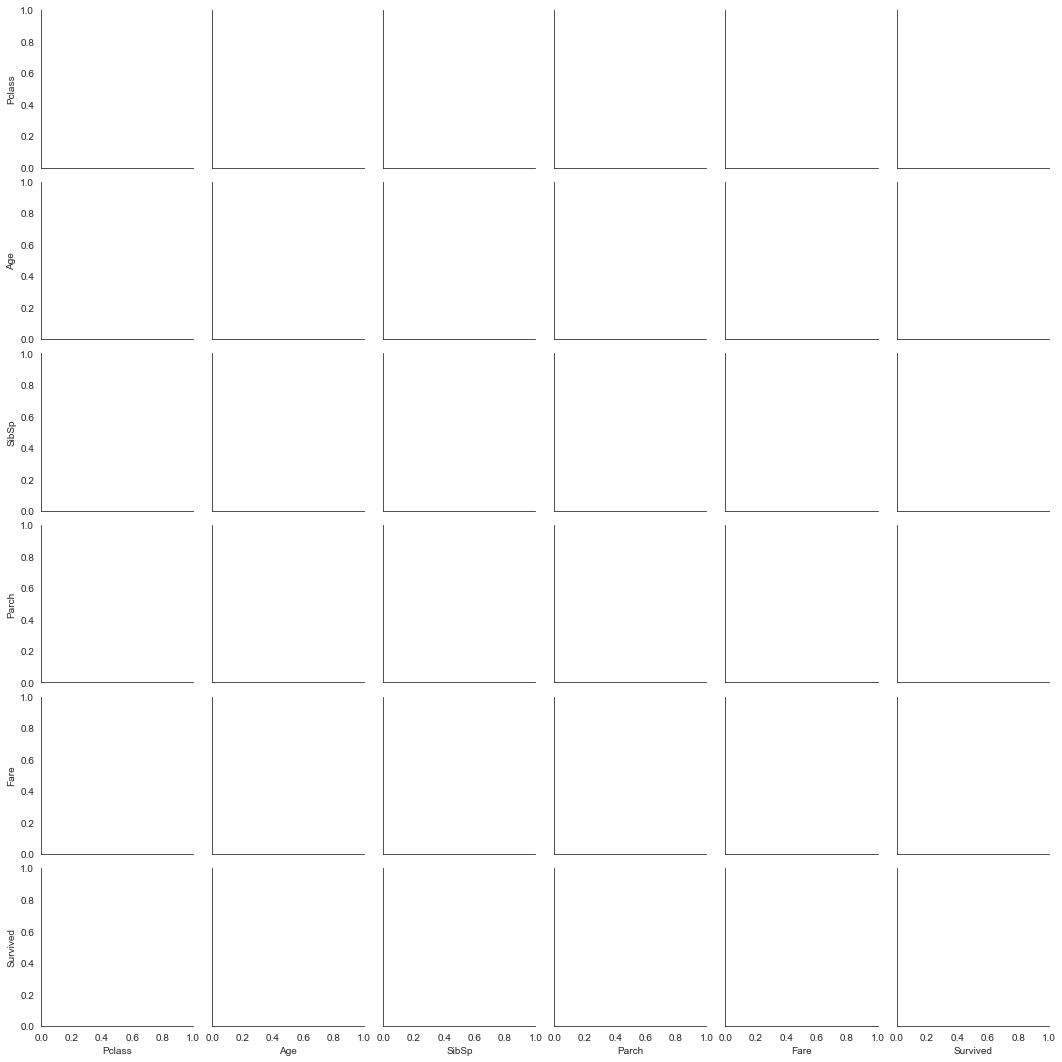

In [17]:
g = sns.PairGrid(titanic)

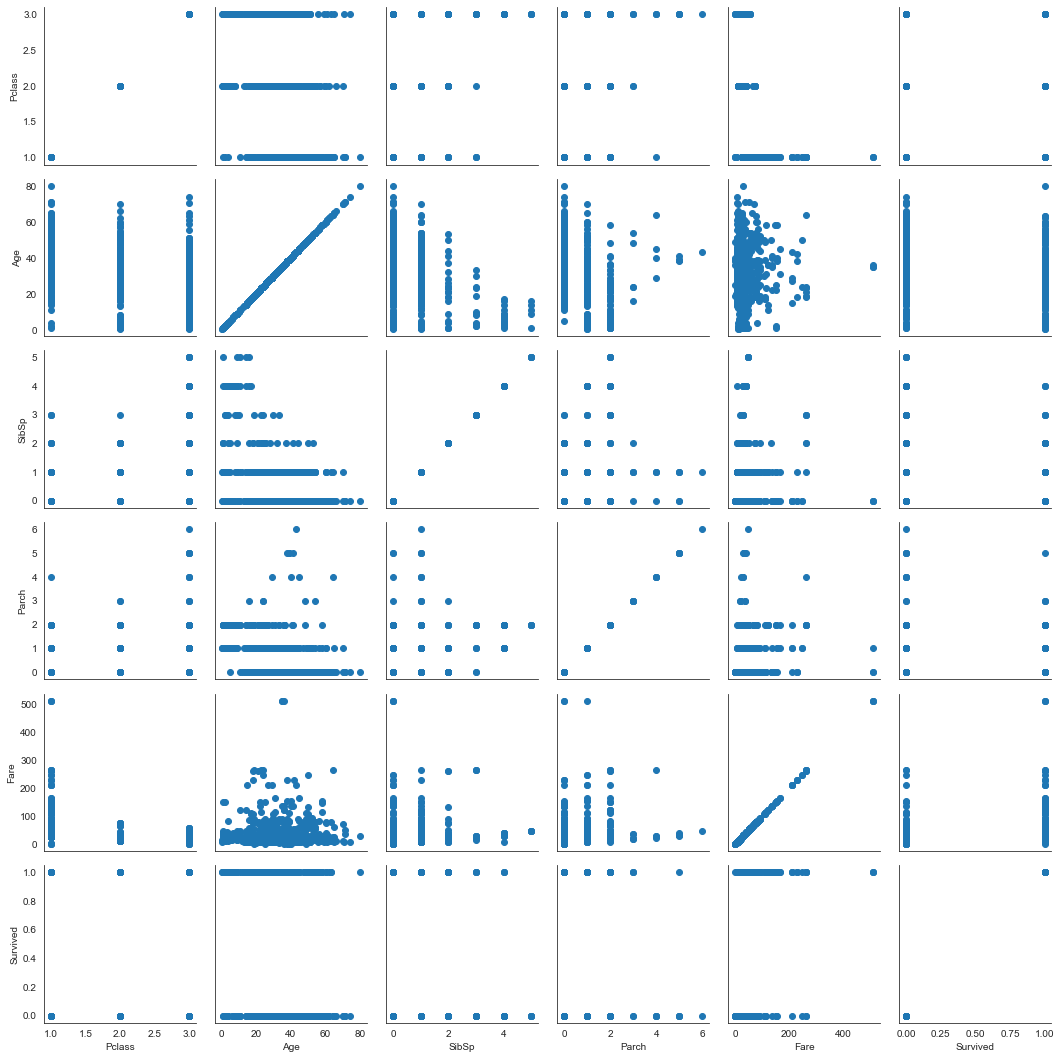

In [18]:
# then map the function or the plot you want 
g.map(plt.scatter)

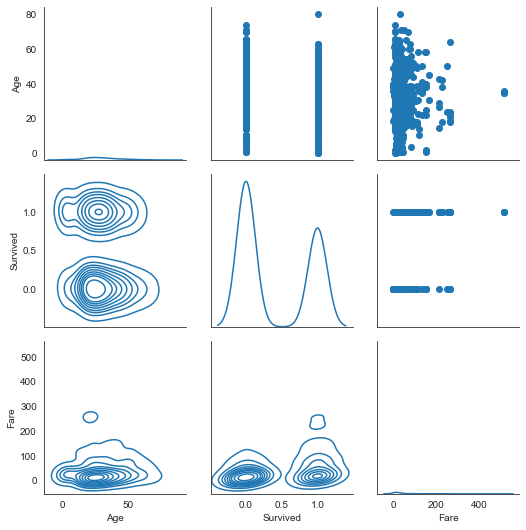

In [22]:
g = sns.PairGrid(titanic[["Age" , "Survived" , "Fare"]])
g.map_diag(sns.kdeplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

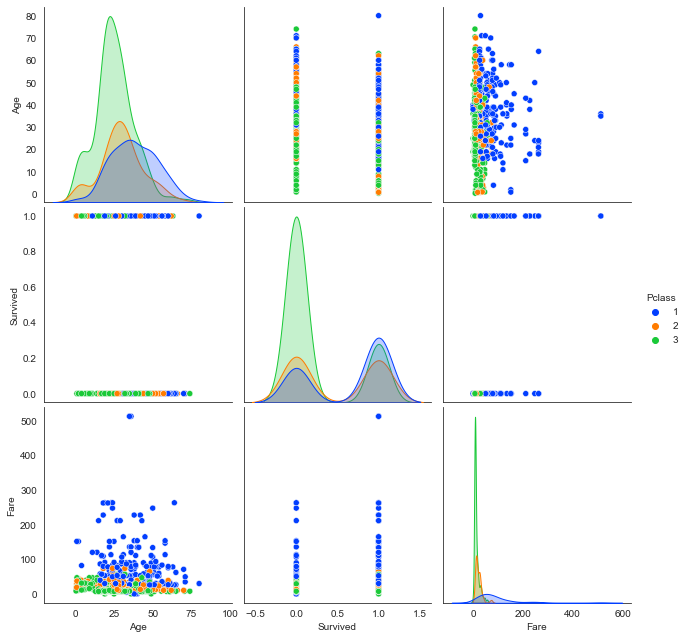

In [36]:
sns.pairplot(titanic[["Age" , "Survived" , "Fare" , "Pclass"]], hue = "Pclass", palette="bright" , size=3)


## Trying som plots 

In [42]:
titanic.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0


<AxesSubplot:xlabel='Sex', ylabel='Age'>

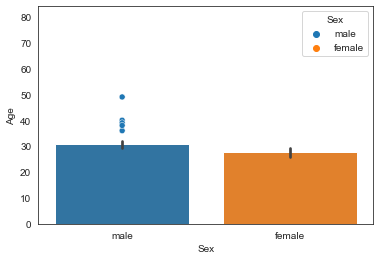

In [48]:
sns.scatterplot(data = titanic , x = "Fare" , y = "Age" , hue = "Sex")
sns.barplot(data = titanic, x = "Sex" , y = "Age")

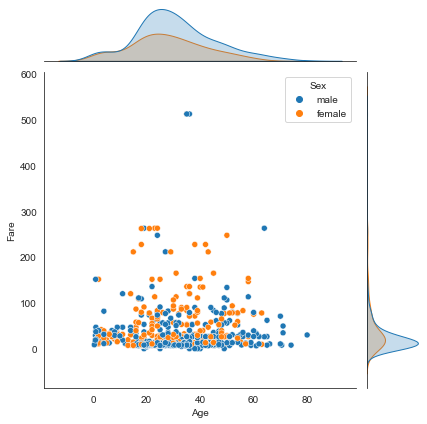

In [56]:
sns.jointplot(data = titanic , x = "Age" , y = "Fare" , hue = "Sex")
